# Best Flights: a study of the change in flight price

# Introduction

Everyone wants to find the cheapest option for their next purchase, whether it is the hottest new tech, or a new christmas sweater for the holidays. In my case, I want to focus on exploring flight prices.

Flight prices intrigue me as an area of research as it is applicable to many. There were an estimated 22.2 million flights in the year of 2021, and as the affects of COVID on the airline industry slowly subside this number will only grow as people start getting back into travel. With this amount of travel and an inevitable increase, I hope to be able to use data to find the cheapest way to purchase flights in an attempt to shed light on the flight booking industry and help people get the most out of their money.

# Aims and Objectives

I aim to find the cheapest time to fly, by examining flight prices from flight booking websites and comparing different factors.

Some of the questions I have chosen to focus on are:

-   Which day of the week is it cheapest to fly?
-   Which month of the year is it cheapest to fly?
-   How many days in advance should you book?

# Data

To find the cheapest flight opportunities I have chosen to web scrape a flight booking service's prices. Data will be acquired through the flight booking service named skiplagged. This service provides great url-based flight data and allows simple web scraping through html attributes. I have tried two other services, Expedia and Kayak, but both had protections preventing web scraping such as dynamic selectors.

To analyze this data I will create easy to read charts that anyone who is familiar with flying will understand. An example for finding the day of week would be a bar chart for the average of flight prices in that day.

### Flight Locations

The flight locations I have chosen to focus on are:
- Toronto, Canada to London, England

These locations are of interest to me as I live in Toronto and go to school in London as well as have family in London.

### Format of Requests:

https://skiplagged.com/flights/YTO/LON/2022-12-20
- YTO - flight start location (Toronto)
- LON - flight end location (London)
- 2022-12-20 - date

### Data Ethics

As previously described the data is coming from a website named Skiplagged. According to the websites "Use License" in the terms and conditions, permission is granted to view one copy of the materials for personal, non-commercial use. Assuming this means one copy of each material (date, flights, etc) this project should not breach the terms and conditions.

### Data Biases

As with any data there is a potential for biases. With flight prices the data can be skewed based on the website, potential advertising, and the place in the world you are trying to go. However I feel these biases will not skew the data in any remarkable way, but it is important to understand them.



# Web Scraping Flights

### Main Tools

- Selenium - Used to create a fake browser and render each page fully before retrieving the HTML
- BeautifulSoup - Used to scrape the prices from the HTML
- Pandas - Used to store data in table and create charts from it
- Numpy - Used to create a mean value from the outputed flight prices

### How

1. Check if there is previous data and use that if it exists
2. Loop through each date on the chrome selenium driver
	1. Wait for page load
	2. Grab HTML in BeautifulSoup
	3. Select the prices based on a price css selector
	4. Clean each price to be a float and mean out the values
	5. Add date, mean price, day, and month to pandas dataframe
3. Store to DataFrame if data does not exist

In [1]:
# Importing the necessary libraries
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from datetime import date, datetime, timedelta
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [13]:
# if prices file exists from previous scrape, read from that file
if (os.path.exists(os.getcwd() + "/prices.csv")):
    price_by_date = pd.read_csv("./prices.csv")
else:
    # initialize chrome driver
    driver = webdriver.Chrome()

    def get_avg_price_by_date(start_place, end_place, date):
        # create url from search parameters
        url = "https://skiplagged.com/flights/" + \
            start_place + "/" + end_place + "/" + date
        # initialize browser with url
        driver.get(url)
        # sleep to load dynamic content
        time.sleep(8)
        # create soup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # select prices and clean text to float number list
        prices = soup.select("[data-orig-price]")
        prices = [float(price.get_text()[1:]) for price in prices]
        # return mean
        return np.mean(prices)

    # template for dataframe
    data = {
        "date": [],
        "day": [],
        "week": [],
        "month": [],
        "price": [],
    }

    # create date range
    date_range = pd.date_range(start='2023-01-01', end='2023-06-30')

    # loop through dates in range
    for date in date_range:
        format_date = date.strftime("%Y-%m-%d")
        # get average price
        avg_price = get_avg_price_by_date("YTO", "LON", format_date)
        # append cleaned data to dictionary
        data["date"].append(format_date)
        data["price"].append(avg_price)
        data["day"].append(date.isoweekday())
        data["month"].append(date.strftime("%m"))
        data["month"].append(date.isocalendar()[1])

    # create dataframe
    price_by_date = pd.DataFrame(data)
    # change index to date
    price_by_date.set_index("date", inplace=True)

    # save to csv for quick use
    price_by_date.to_csv("./prices.csv")

    # close driver
    driver.quit()

# First ten rows of data
price_by_date.head(10)


,date,day,month,price
0,2023-01-01,7,1,413.384615
1,2023-01-02,1,1,416.230769
2,2023-01-03,2,1,321.230769
3,2023-01-04,3,1,360.153846
4,2023-01-05,4,1,358.923077
5,2023-01-06,5,1,363.000000
6,2023-01-07,6,1,321.538462
7,2023-01-08,7,1,321.461538
8,2023-01-09,1,1,290.076923
9,2023-01-10,2,1,262.538462


## Day of the week

This plot shows how the day of the week affects the flight price. Day 1 (Monday) to Day 7 (Sunday).

<AxesSubplot: xlabel='day of week', ylabel='average price'>

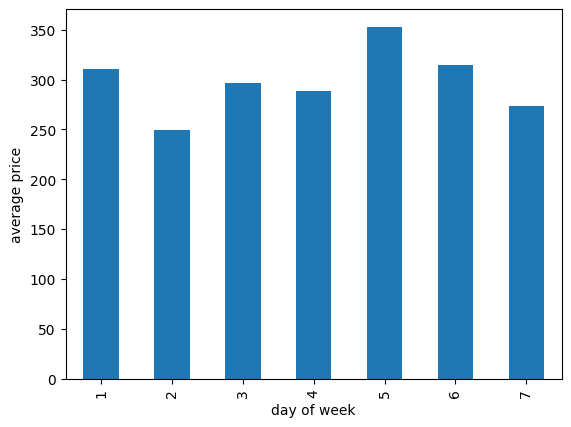

In [ ]:
# bar plot by day of week
price_by_date[1:176].groupby(['day'])['price'].mean().plot(
    kind="bar", xlabel="day of week", ylabel="average price")

Here we can see that tuesday (2) is the cheapest with friday (5) being the most expensive.

<AxesSubplot: xlabel='month'>

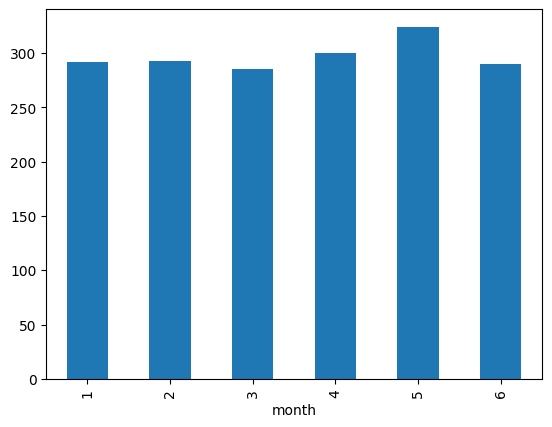

In [ ]:
# bar plot by month
price_by_date[0:181].groupby(['month'])['price'].mean().plot(kind="bar")

# Assumed there would be a drop in pice month by month the farther you go away, but instead is correlated to month seasons


# Resources

-   https://financesonline.com/number-of-flights-worldwide/
- https://skiplagged.com/terms

### Tech

-   https://pandas.pydata.org/docs/index.html
